# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для того, чтобы результаты выполнения кода с использованием псевдослучайных чисел можно было сравнить

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [x] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [x] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

Отображаем 10 случайных строк тренировочного датасета

In [3]:
# your code here
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

Отображаем первые 5 и последние 5 объектов тестового датасета

In [4]:
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
..      ...         ...          ...           ...         ...      ...   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
..         ...                       ...    ...  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0  

[1000 rows x 13 columns]

Создаем функцию, передающую список полей, содержащих пропуски

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [6]:
def column_isnull(df):
  return df.columns[df.isnull().any()].to_list()

Выводим список полей тренировочного датасета, содержащих пропуски

In [7]:
column_isnull(df_train)

['mileage', 'engine', 'max_power', 'torque', 'seats']

Выводим список полей тестового датасета, содержащих пропуски

In [8]:
column_isnull(df_test)

['mileage', 'engine', 'max_power', 'torque', 'seats']

Выводим количество дубликатов тренировочного датасета

In [9]:
df_train.duplicated().sum()

985

В тренировочных данных 985 полных дубликатов

Выводим количество дубликатов тестового датасета

In [10]:
df_test.duplicated().sum()

62

В тестовых данных 62 полных дубликата

Устанавливаем ydata-profiling

In [11]:
!pip install ydata-profiling

In [12]:
from ydata_profiling import ProfileReport

In [13]:
profile = ProfileReport(df_train, title="Profiling Report")

Строим дашборд ydata_profiling

In [14]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
profile.to_file("profile_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

Посмотрим на данные в тренировочном датасете еще раз

In [16]:
df_train.sample(10)

name  year  selling_price  \
6973                 Tata Nexon 1.5 Revotorq XT  2018         800000   
2638                         Maruti Wagon R VXI  2006         135000   
4256                     Maruti Swift Dzire VDI  2019         675000   
5699                     Maruti Swift Dzire ZDI  2018         780000   
2629                Maruti Omni E MPI STD BS IV  2016         190000   
5512                         Tata Indica V2 LSi  2008          85000   
4885                         Tata Nano Twist XE  2015         110000   
1964                  Maruti Omni 8 Seater BSII  2010         130000   
2343  Ford EcoSport 1.5 Ti VCT AT Titanium BSIV  2015         775000   
5179                        Mahindra TUV 300 T8  2017         700000   

      km_driven    fuel seller_type transmission         owner     mileage  \
6973      85000  Diesel  Individual       Manual  Second Owner   21.5 kmpl   
2638      62900  Petrol  Individual       Manual   First Owner   18.9 kmpl   
4256      25000  Diesel  Individual       Manual   First Owner   28.4 kmpl   
5699      30000  Diesel  Individual       Manual   First Owner   28.4 kmpl   
2629      80000  Petrol  Individual       Manual  Second Owner   16.8 kmpl   
5512      25000  Petrol  Individual       Manual  Second Owner  16.84 kmpl   
4885      15000  Petrol  Individual       Manual   First Owner   25.4 kmpl   
1964     120000  Petrol  Individual       Manual   Third Owner   19.7 kmpl   
2343      30000  Petrol  Individual    Automatic   First Owner  15.63 kmpl   
5179      40000  Diesel  Individual       Manual   First Owner  18.49 kmpl   

       engine  max_power               torque  seats  
6973  1497 CC  108.5 bhp  260Nm@ 1500-2750rpm    5.0  
2638   998 CC   67.1 bhp        90Nm@ 3500rpm    5.0  
4256  1248 CC  74.02 bhp       190Nm@ 2000rpm    5.0  
5699  1248 CC  74.02 bhp       190Nm@ 2000rpm    5.0  
2629   796 CC   34.2 bhp        59Nm@ 2500rpm    8.0  
5512  1193 CC   64.4 bhp      99.8Nm@ 2700rpm    5.0  
4885   624 CC   37.5 bhp  51Nm@ 4000+/-500rpm    4.0  
1964   796 CC     35 bhp      6.1kgm@ 3000rpm    8.0  
2343  1499 CC  110.4 bhp       140Nm@ 4400rpm    5.0  
5179  1493 CC    100 bhp  240Nm@ 1600-2800rpm    7.0

Посмотрим на типы данных в тренировочном датасете

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Видим, что данные в полях с пропусками, за исключением 'seats', типа 'object' и представлены текстом. Для того, чтобы заполнить их медианами проведем следующие преобразования:

Преобразуем поля 'mileage', 'engine', 'max_power' и 'torque' в тренировочном и тестовом датасете

In [18]:
def mileage_to_float(x):
  if 'kmpl' in x:
    return float(x.replace(' kmpl', ''))
  if 'km/kg' in x:
    return 1.4 * float(x.replace(' km/kg', ''))

In [19]:
def max_power_to_float(x):
  if len(x.replace(' bhp', '')):
    return float(x.replace(' bhp', ''))
  else:
    return np.nan

In [20]:
def torque_to_float(x):
  k = 1
  if 'nm' in x.lower():
    x = x.lower().split('nm')[0]
  if 'kgm' in x.lower():
    x = x.lower().split('kgm')[0]
    k = 9.81
  if '@' in x:
    x = x.split('@')[0]
  if '/' in x:
    x = x.split(' /')[0]
  if '(' in x:
    x = x.split('(')[0]
  return k * float(x)


In [21]:
a = '113.75nm'
float(a.split('nm')[0])

113.75

In [22]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: mileage_to_float(x) if not pd.isnull(x) else np.nan)
df_test['mileage'] = df_test['mileage'].apply(lambda x: mileage_to_float(x) if not pd.isnull(x) else np.nan)
df_train['engine'] = df_train['engine'].apply(lambda x: float(x.replace(' CC', '')) if not pd.isnull(x) else np.nan)
df_test['engine'] = df_test['engine'].apply(lambda x: float(x.replace(' CC', '')) if not pd.isnull(x) else np.nan)
df_train['max_power'] = df_train['max_power'].apply(lambda x: max_power_to_float(x) if not pd.isnull(x) else np.nan)
df_test['max_power'] = df_test['max_power'].apply(lambda x: max_power_to_float(x) if not pd.isnull(x) else np.nan)
df_train['torque'] = df_train['torque'].apply(lambda x: torque_to_float(x) if not pd.isnull(x) else np.nan)
df_test['torque'] = df_test['torque'].apply(lambda x: torque_to_float(x) if not pd.isnull(x) else np.nan)

Добавим копии датасетов для сравнения статистик до заполнения пропусков и после

In [23]:
df_train_base = df_train.copy()
df_test_base = df_test.copy()

Добавим функцию, заменяющую пропуски полей тренировочного и тестового датасета медианой тренировочного датасета

In [24]:
def replace_median(column_name):
  median_value = df_train[column_name].median()
  df_train[column_name] = df_train[column_name].fillna(median_value)
  df_test[column_name] = df_test[column_name].fillna(median_value)

Применим эту функцию к полям, содержащим пропуски

In [25]:
columns_isnull = df_train.columns[df_train.isnull().any()].to_list()
for column in columns_isnull:
  replace_median(column)

Смотрим на результат - пропусков нет

In [26]:
df_train.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [27]:
df_test.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

### **Задание 2 (0.5 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [x] Отобразите такие объекты (0.15 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


Находим дубликаты с одинаковым признаковым описанием, выводим их количество

In [28]:
column_features = df_train.columns[df_train.any()].to_list()
column_features.remove('selling_price')
df_train.duplicated(subset=column_features, keep='first').sum()

1159

В тренировочном датасете 1159 объектов с одинаковым признаковым описанием, отобразим их

In [29]:
df_train.loc[df_train.duplicated(subset=column_features, keep='first'), :]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
254       35000  Petrol  Individual       Manual   First Owner    18.90   
258       50000  Petrol  Individual       Manual  Second Owner    18.60   
268       70000  Petrol  Individual       Manual  Second Owner    19.10   
324        9000  Diesel      Dealer    Automatic   First Owner    13.60   
325       20000  Petrol      Dealer    Automatic   First Owner    22.37   
...         ...     ...         ...          ...           ...      ...   
6947      60000  Petrol  Individual       Manual  Second Owner    18.00   
6984      24000  Diesel  Individual       Manual   First Owner    24.40   
6989      50000  Diesel  Individual       Manual   First Owner    26.59   
6997      25000  Diesel  Individual       Manual   First Owner    23.57   
6998      25000  Diesel  Individual       Manual   First Owner    23.57   

      engine  max_power  torque  seats  
254   1197.0      82.00   114.0    5.0  
258   1197.0      85.80   114.0    5.0  
268   1197.0      85.80   114.0    5.0  
324   1999.0     177.00   430.0    5.0  
325   2487.0     214.56   202.0    5.0  
...      ...        ...     ...    ...  
6947   995.0      62.00    90.3    5.0  
6984  1498.0      98.63   215.0    5.0  
6989  1248.0      74.00   190.0    5.0  
6997  1396.0      70.00   140.0    5.0  
6998  1396.0      70.00   140.0    5.0  

[1159 rows x 13 columns]

Удаляем повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставляем первую строку по этому автомобилю

In [30]:
df_train = df_train.drop_duplicates(subset=column_features, keep='first')

Смотрим на результат: дубликатов нет

In [31]:
df_train.duplicated(subset=column_features, keep='first').sum()

0

Обновляем индексы

In [32]:
df_train = df_train.reset_index(drop=True)

In [33]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

Обработка столбцов была проведена при замене пропусков на медианы

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  torque         5840 non-null   float64
 12  seats          5840 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 593.2+ KB


Поле 'torque' мы тоже обработали, но мы удаляем его для сопоставимости результатов

In [35]:
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.

In [36]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

In [37]:
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [38]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.544906  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     4.228385   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    17.000000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.330000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.320000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    46.816000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

Выведем основные статистики тренировочного датасета до заполнения пропусков. Статистики схожи, следовательно мы не внесли каких-либо серьезных сдвигов в изначальные распределения

In [39]:
df_train_base.describe()

year  selling_price     km_driven      mileage       engine  \
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000  6797.000000   
mean   2013.818403   6.395152e+05  6.958462e+04    19.529237  1458.327203   
std       4.053095   8.089419e+05  5.772400e+04     4.266192   501.183890   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.549990e+05  3.500000e+04    16.800000  1197.000000   
50%    2015.000000   4.500000e+05  6.000000e+04    19.330000  1248.000000   
75%    2017.000000   6.750000e+05  9.700000e+04    22.320000  1582.000000   
max    2020.000000   1.000000e+07  2.360457e+06    46.816000  3604.000000   

         max_power       torque        seats  
count  6802.000000  6796.000000  6797.000000  
mean     91.500023   180.834722     5.419008  
std      35.821622   110.101267     0.965767  
min       0.000000    47.088000     2.000000  
25%      68.050000   111.834000     5.000000  
50%      82.000000   170.000000     5.000000  
75%     102.000000   209.000000     5.000000  
max     400.000000  1863.900000    14.000000

In [40]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [41]:
df_train.shape

(5840, 12)

In [42]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

Визуализируем попарные распределения признаков тренировочного датасета   
Ответы на вопросы:
 - На основе распределений можно предположить связь признаков с целевой переменной, в особенности сильную связь можно наблюдать для признаков: 'year', 'engine', 'max_power' и 'km_driven'
 - На основе распределений можно выдвинуть гипотезу о корреляциях признаков: 'engine' - 'mileage' - 'max_power' - 'seats'

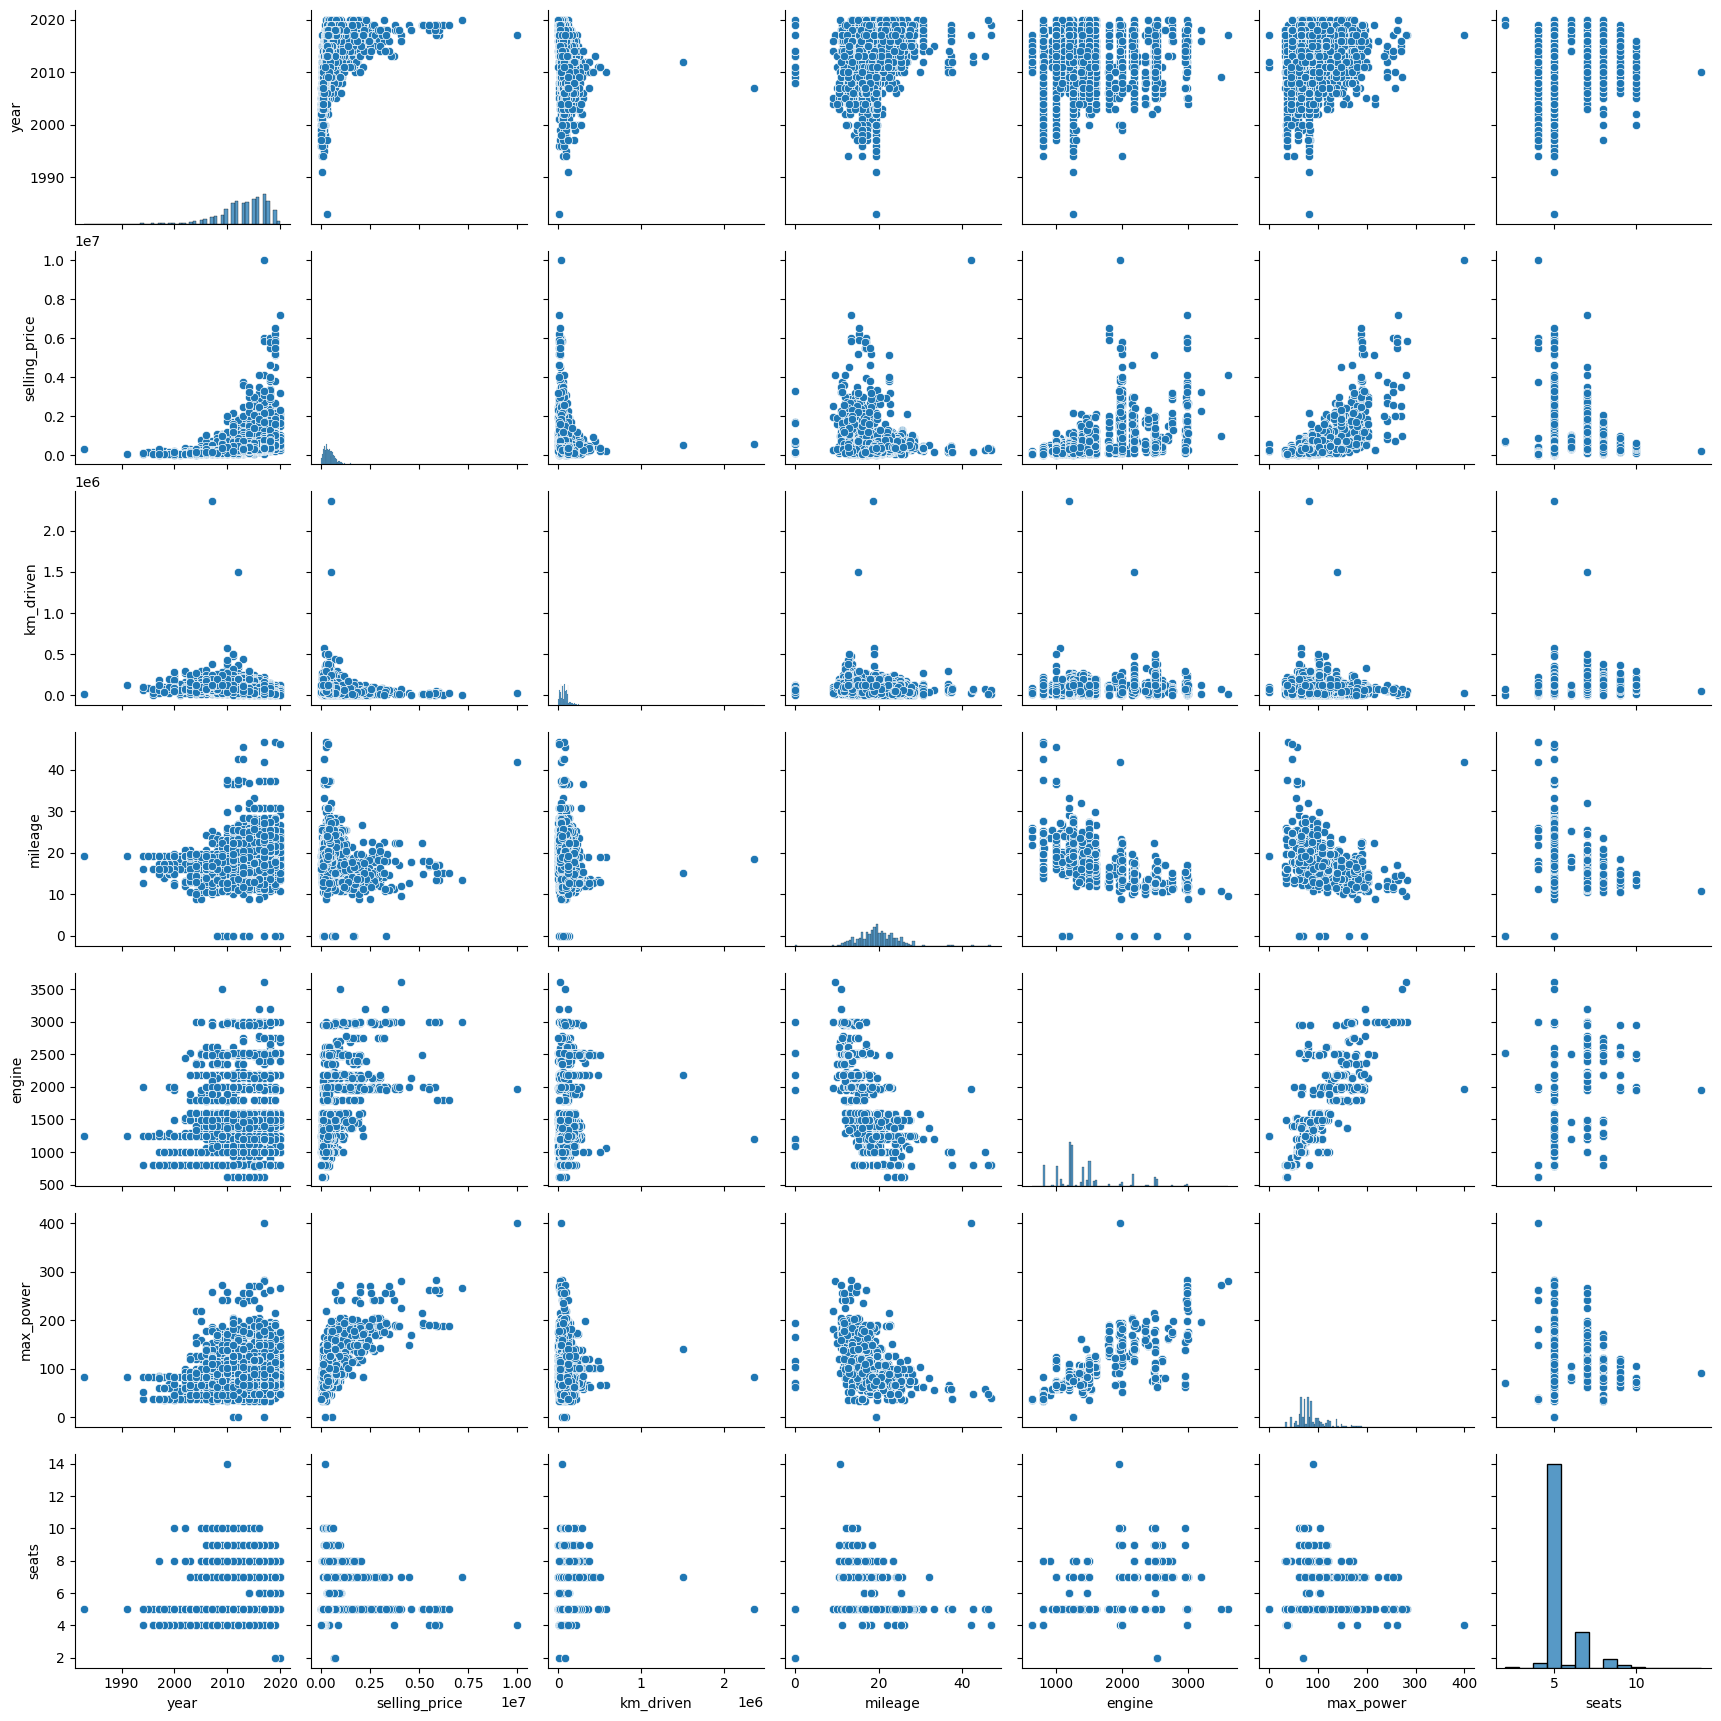

In [43]:
sns.pairplot(df_train)

Построим pairplot по тестовым данным.  
Совокупности признаков при разделении на трейн и тест оказались похожими

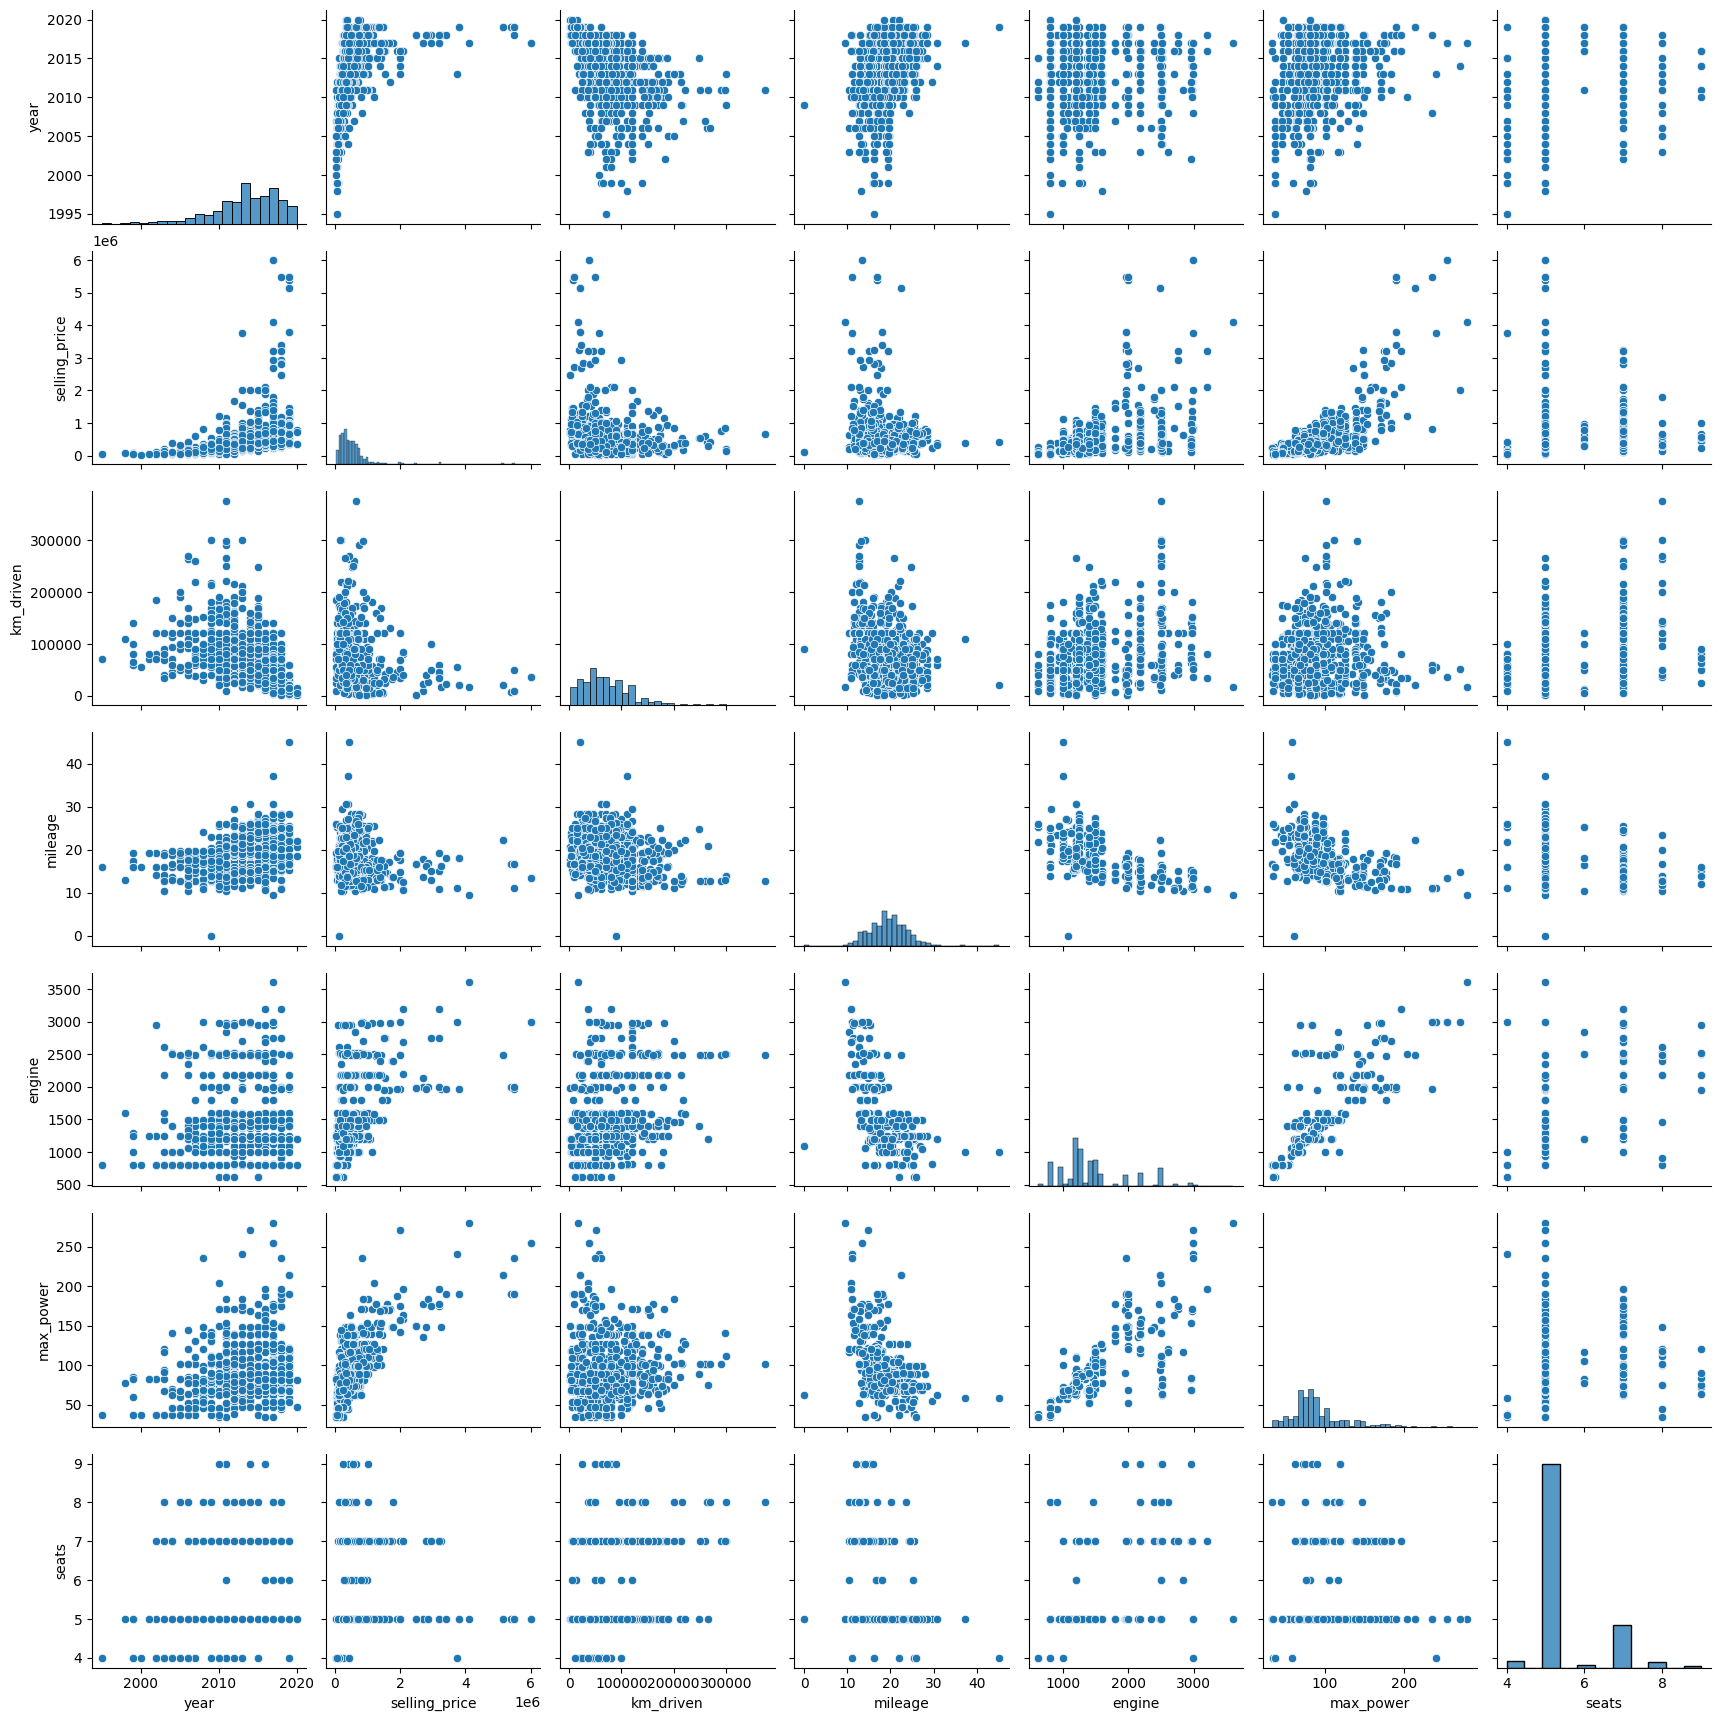

In [44]:
sns.pairplot(df_test)

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Ответы на вопросы:  
- Наименее скоррелированы между собой year и engine
- Довольно сильная положительная линейная зависимость наблюдается между max_power и torque, max_power и engine, max_power и silence_price
- Да, правильно, чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи

<Axes: >

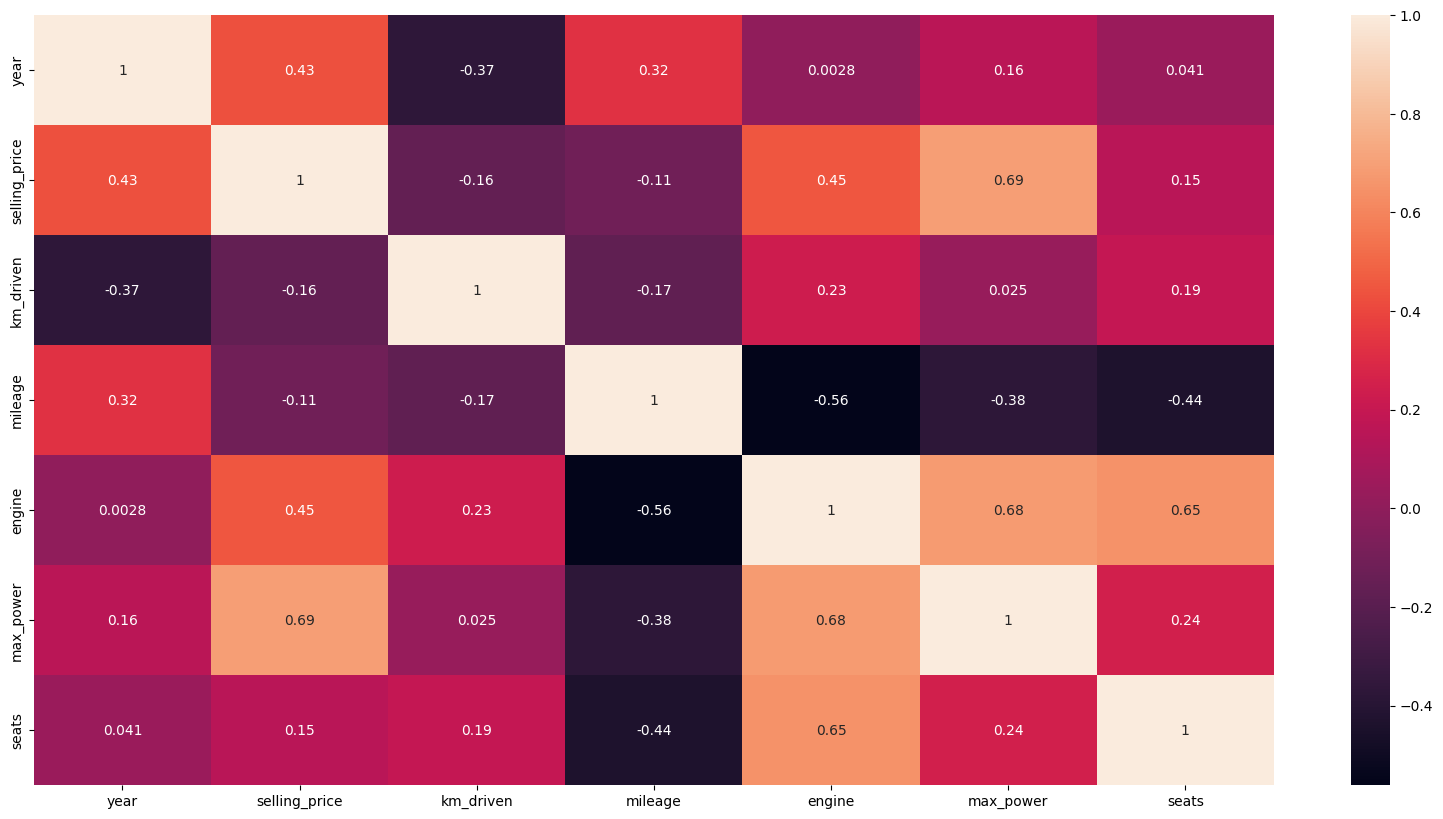

In [45]:
df_corr = df_train.select_dtypes(['int', 'float'])
plt.figure(figsize= (20,10))
sns.heatmap(df_corr.corr(), annot = True, fmt='.2g')

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Визуализируем распределение всех признаков, в том числе категориальных. Исходя из того, что уникальных значений в поле 'name' - 1924, для анализа будем использовать только марку автомобиля.

In [46]:
df_train_cat = df_train.copy()
df_test_cat = df_test.copy()
df_train_cat['name'] = df_train_cat['name'].apply(lambda x: x.split()[0] if not pd.isnull(x) else np.nan)
df_test_cat['name'] = df_test_cat['name'].apply(lambda x: x.split()[0] if not pd.isnull(x) else np.nan)

Так как в трениновочном датасете не хватает производетелей Опель и Ашок - брутфорсим

В наиболее широко представленной в датасетах марке - Maruti изменим две строчки на нужные нам марки, наши изменения не должны сильно отразиться на качестве модели

In [47]:
df_train_cat.loc[0,'name'] = 'Opel'
df_train_cat.loc[3,'name'] = 'Ashok'

In [48]:
from tqdm.notebook import tqdm
import seaborn as sns

0it [00:00, ?it/s]

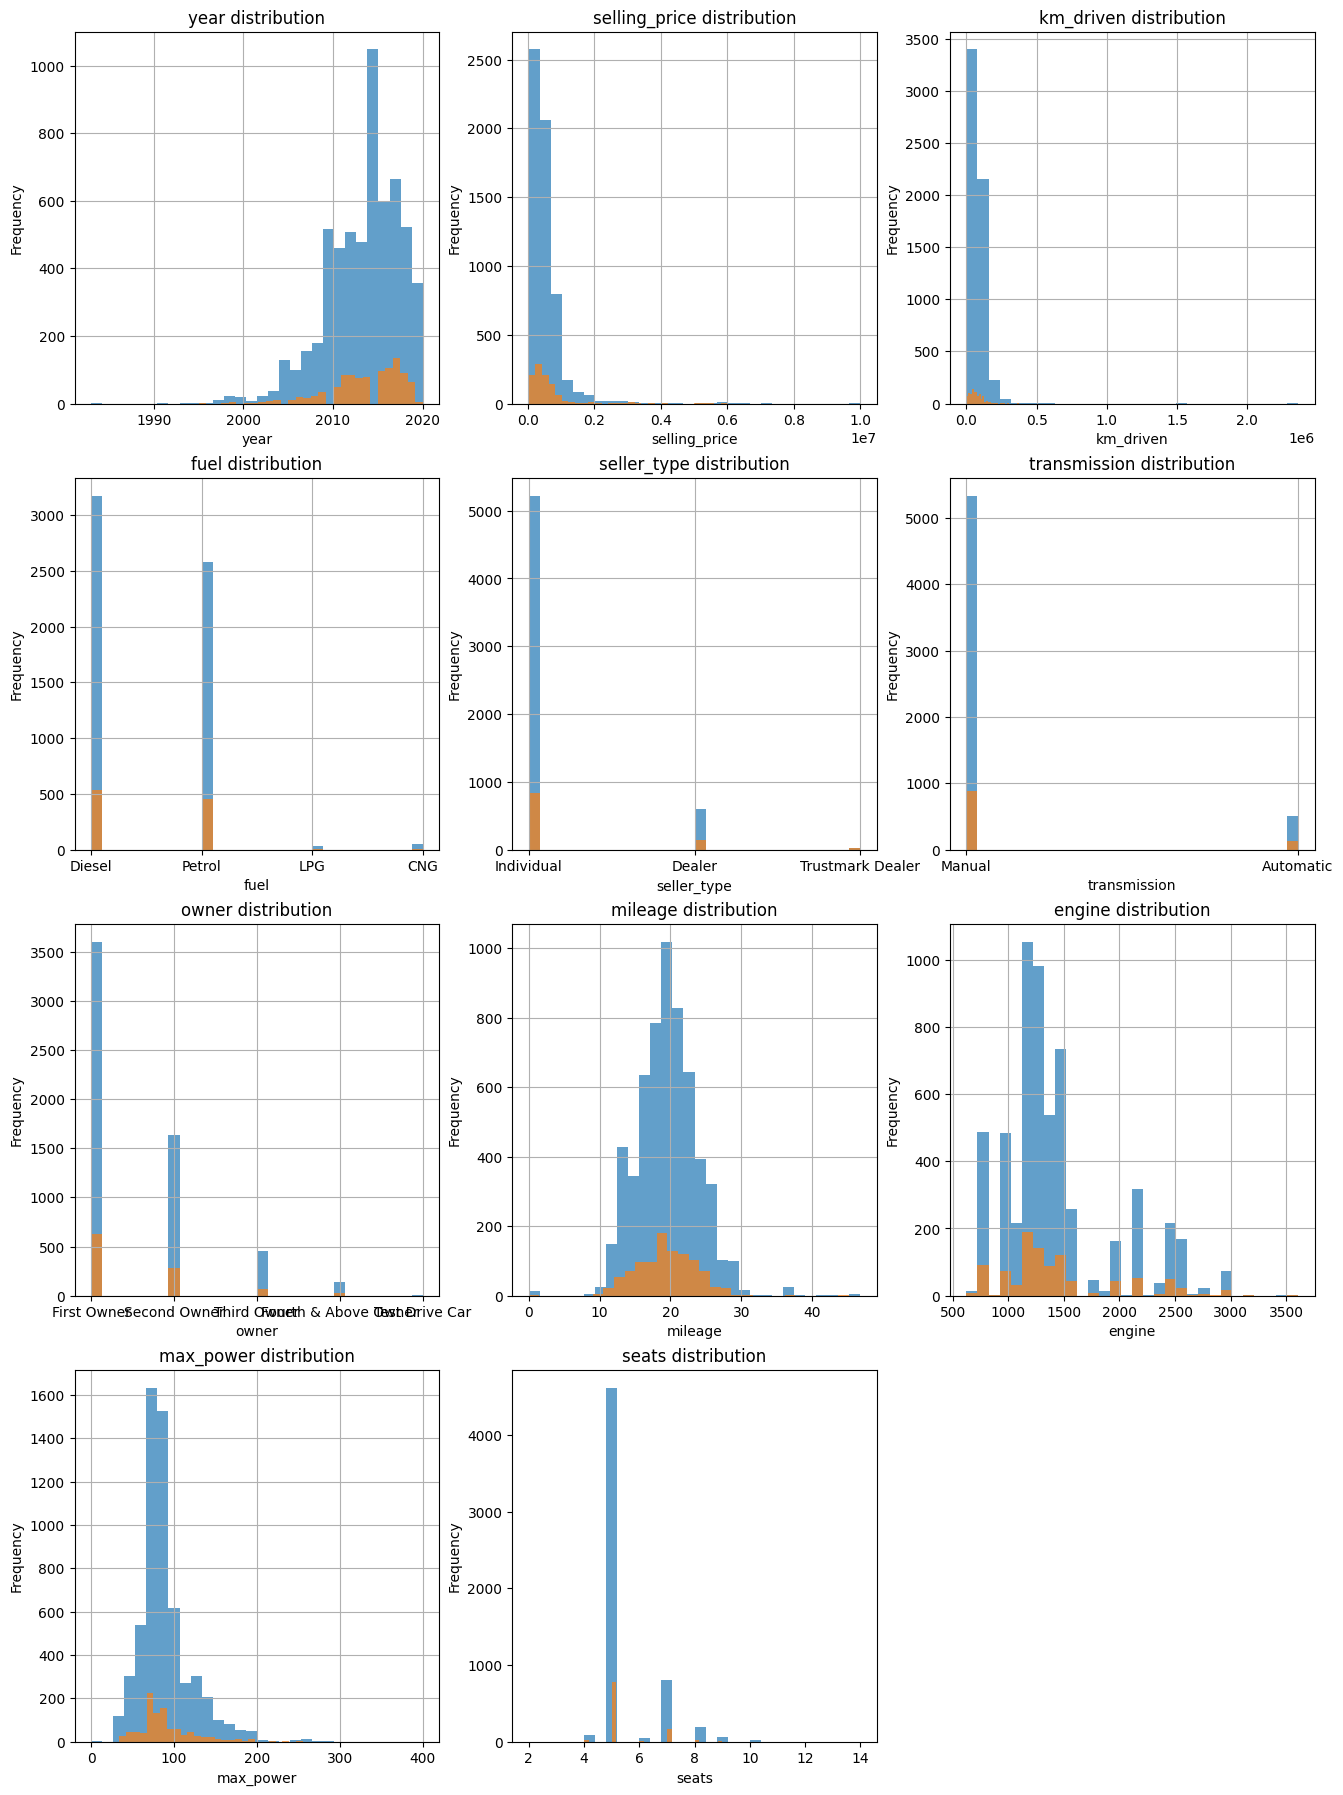

In [49]:
numeric_cols = df_train.loc[:, df_train.columns != 'name'].columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(16, (num_cols // 3 + 1) * 7))
for ax, col in tqdm(zip(axes.flatten(), numeric_cols)):
    ax.hist(df_train[col], bins=30, alpha=0.7)
    ax.hist(df_test[col], bins=30, alpha=0.7)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.grid()
plt.show()

Исходя из сведений, отображенных на гистограммах можно сделать вывод о достаточно схожем распределении признаков в датасетах. Однако можно заметить, что в тренировочном датасете не представлены 2005, 2009 и 2015 годы выпуска автомобилей.

Сопоставим распределение числовых признаков тренировочного и тестового датасетов

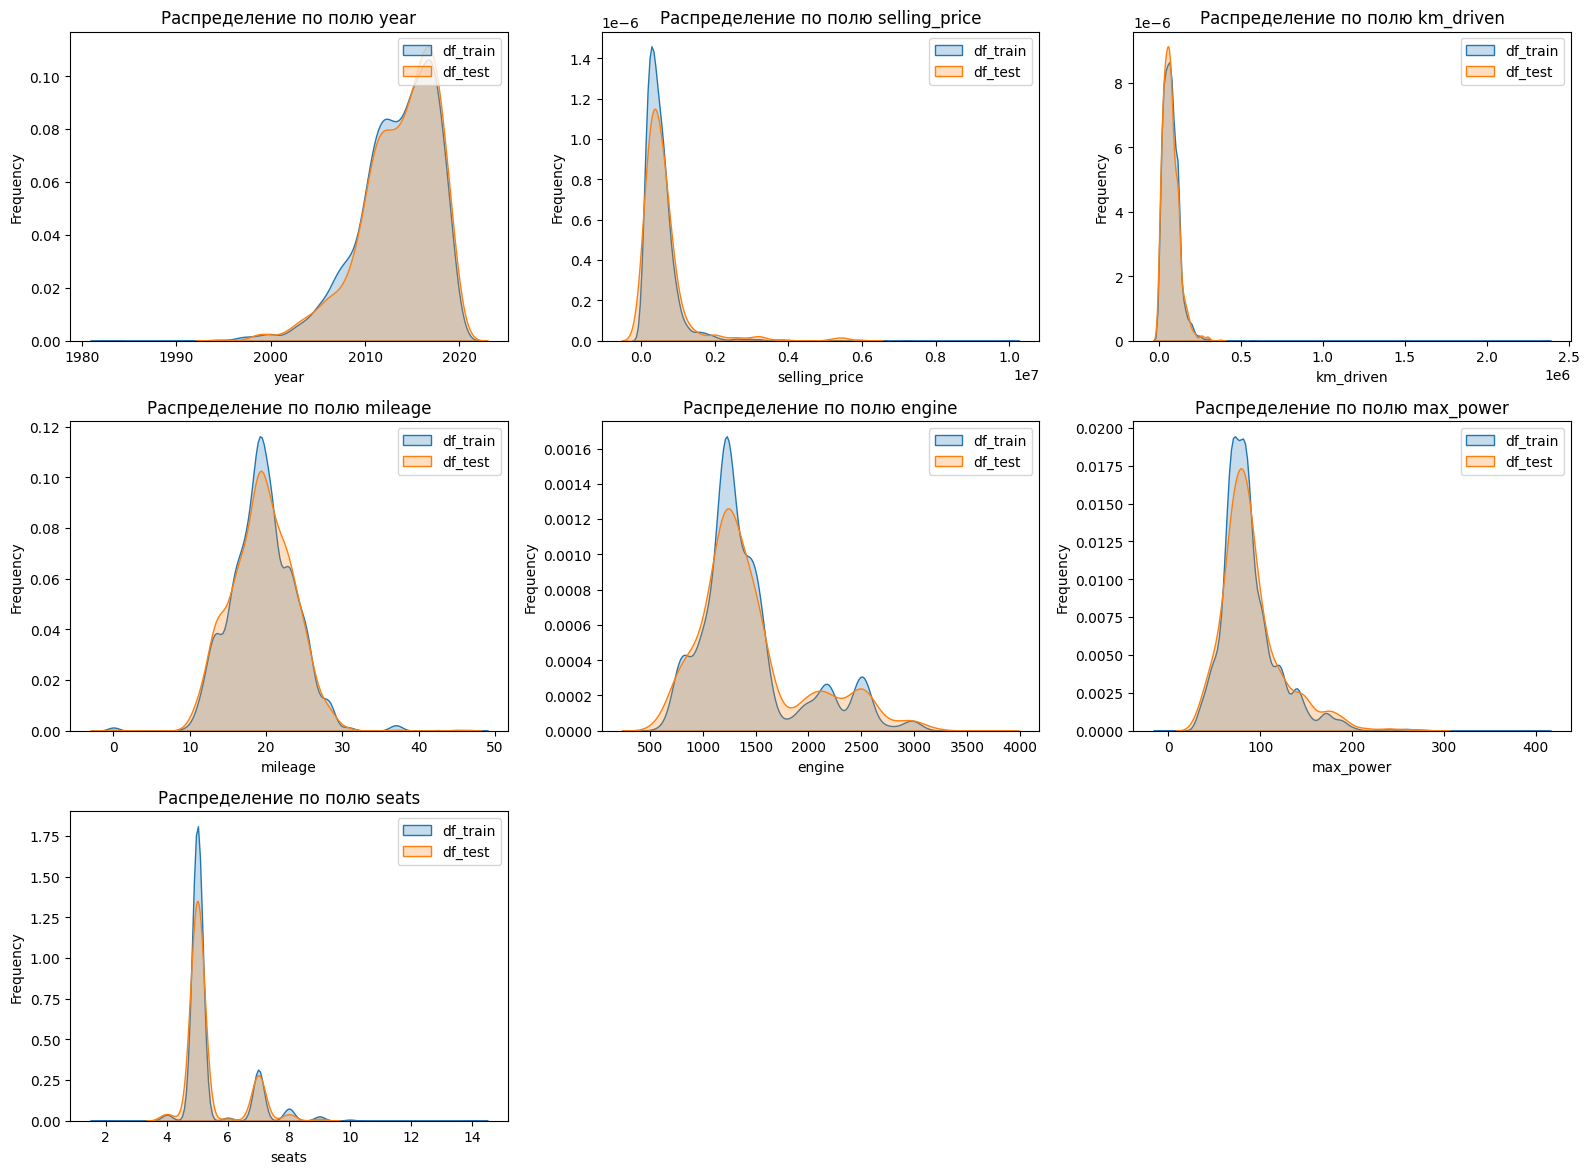

In [50]:
numeric_cols = df_train.select_dtypes([int, float]).columns
total_axes = len(numeric_cols)
fig = plt.figure(figsize=(16, ((total_axes//3) + (total_axes % 3))*4))
for i, state in enumerate(numeric_cols):
    ax = fig.add_subplot((total_axes//3) + (total_axes % 3), 3, i+1)
    # df_state = df[df['state_mark'] == state]
    sns.kdeplot(df_train[state], fill=True, label = 'df_train')
    sns.kdeplot(df_test[state], fill=True, label = 'df_test')
    plt.title(f'Распределение по полю {state}')
    plt.legend()
    plt.xlabel(f'{state}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Для сопоставления распределений тренировочного и тестового набора данных объедим их и добавим категориальный признак

In [51]:
df_train_an = df_train.copy()
df_train_an['df_type'] = 'df_train'
df_test_an = df_test.copy()
df_test_an['df_type'] = 'df_test'
df_full = pd.concat([df_train_an, df_test_an], axis=0).reset_index(drop=True)

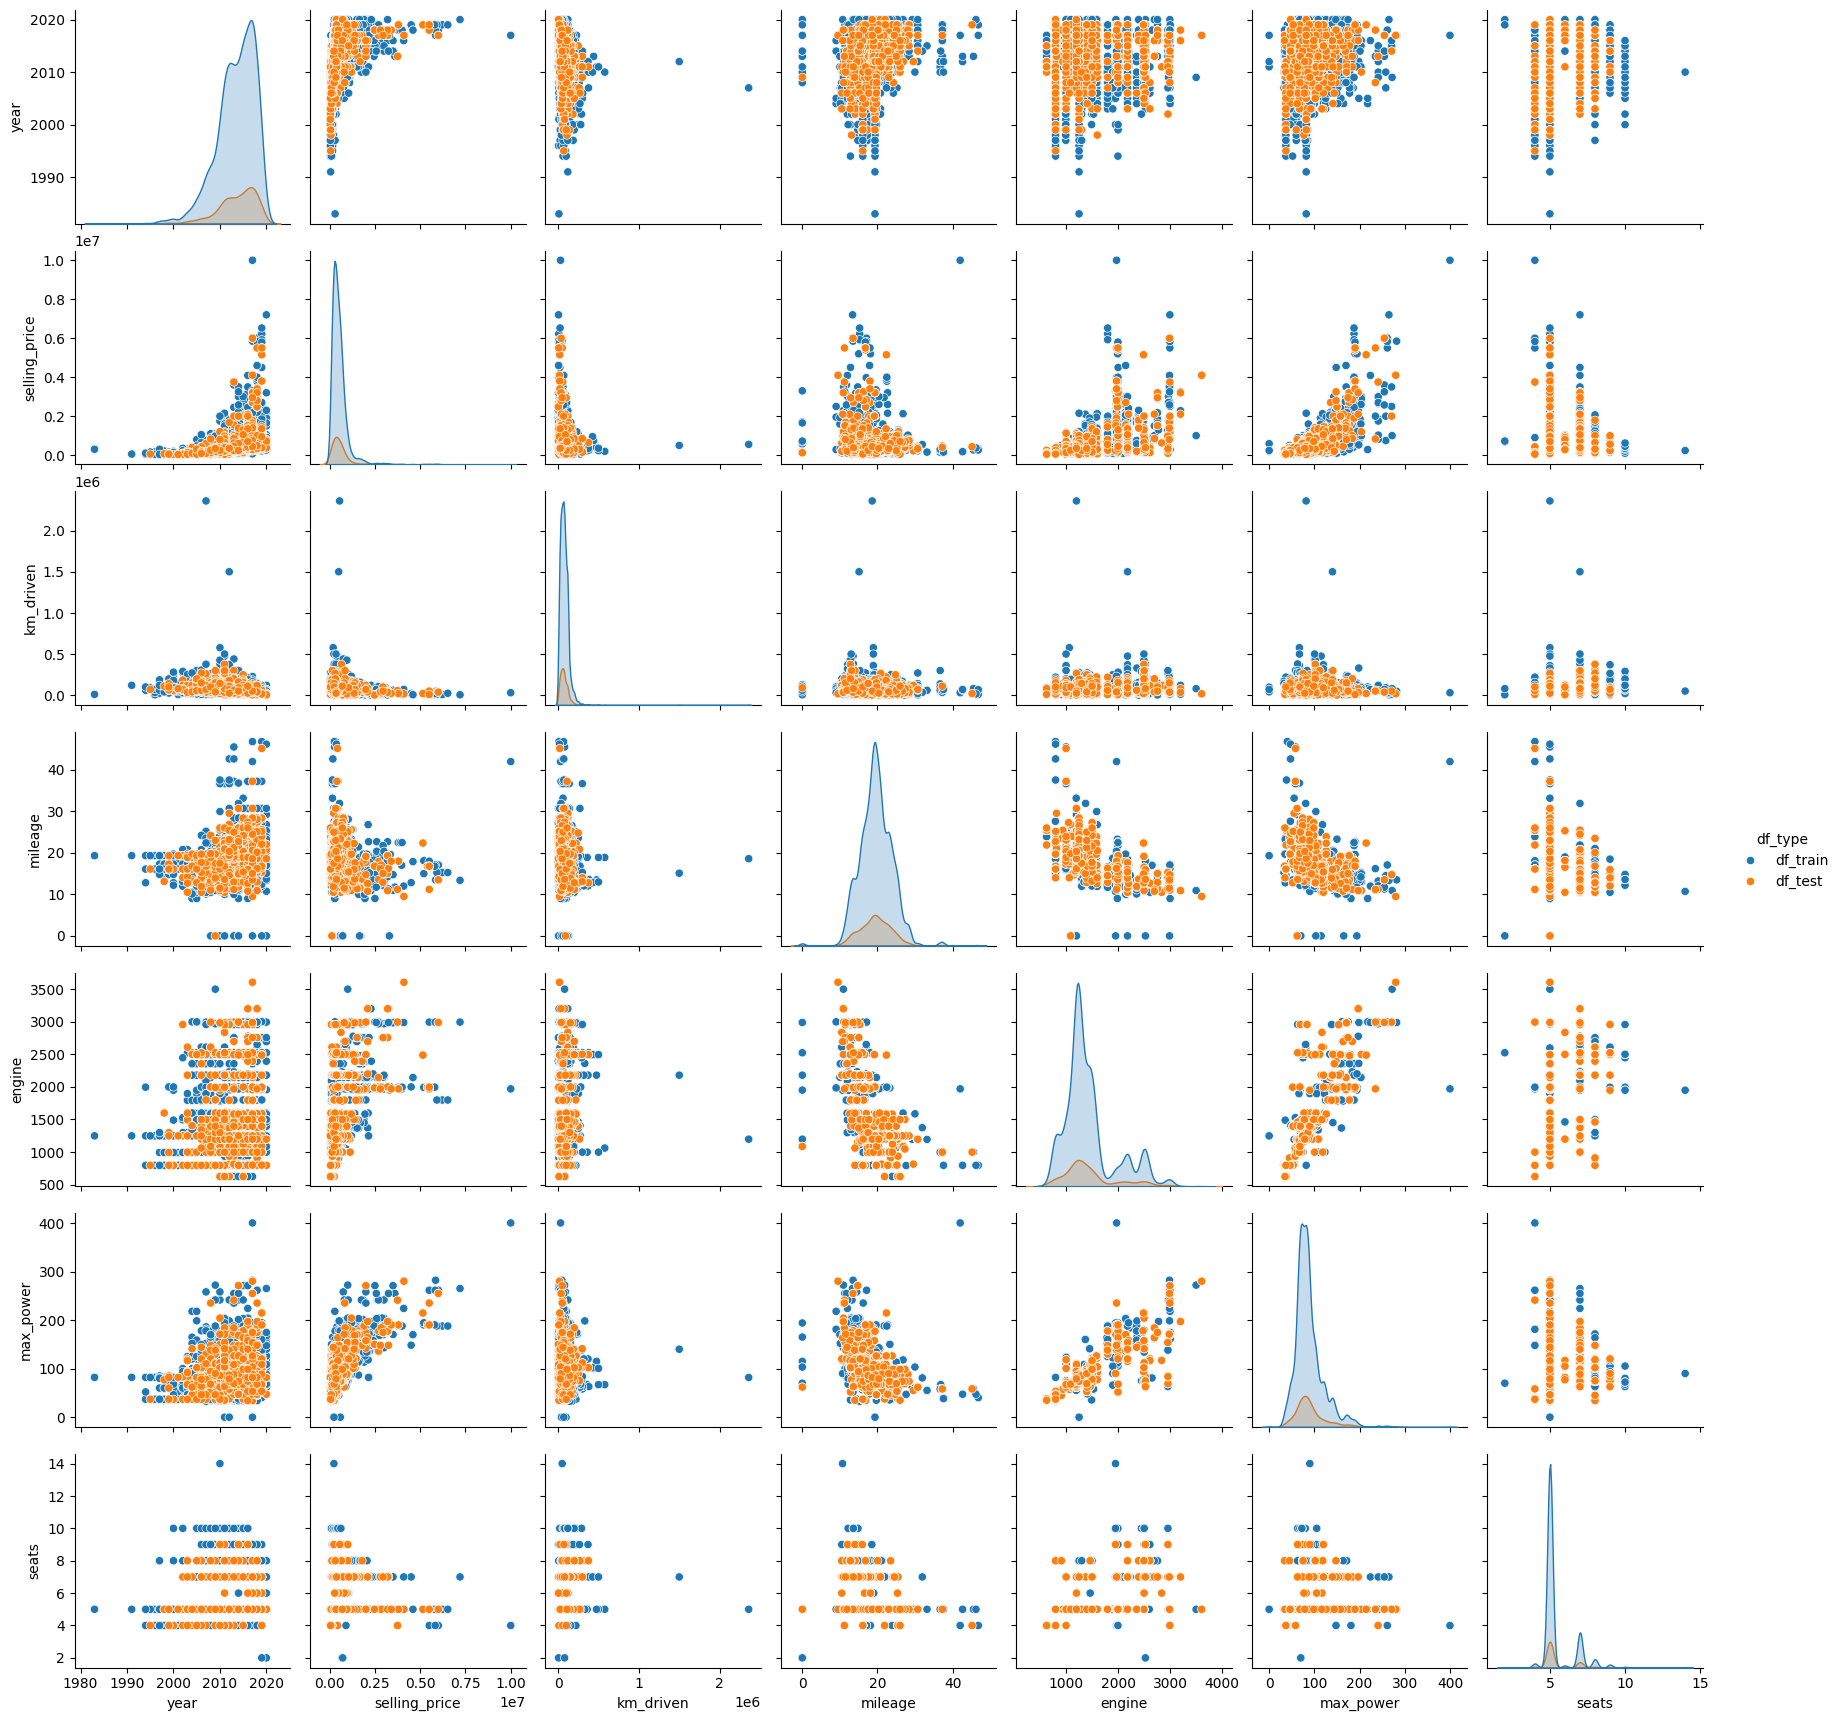

In [52]:
sns.pairplot(df_full, hue='df_type')

Распределение признаков для тестового и тренировочного датасета очень схожи

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']


<Axes: >

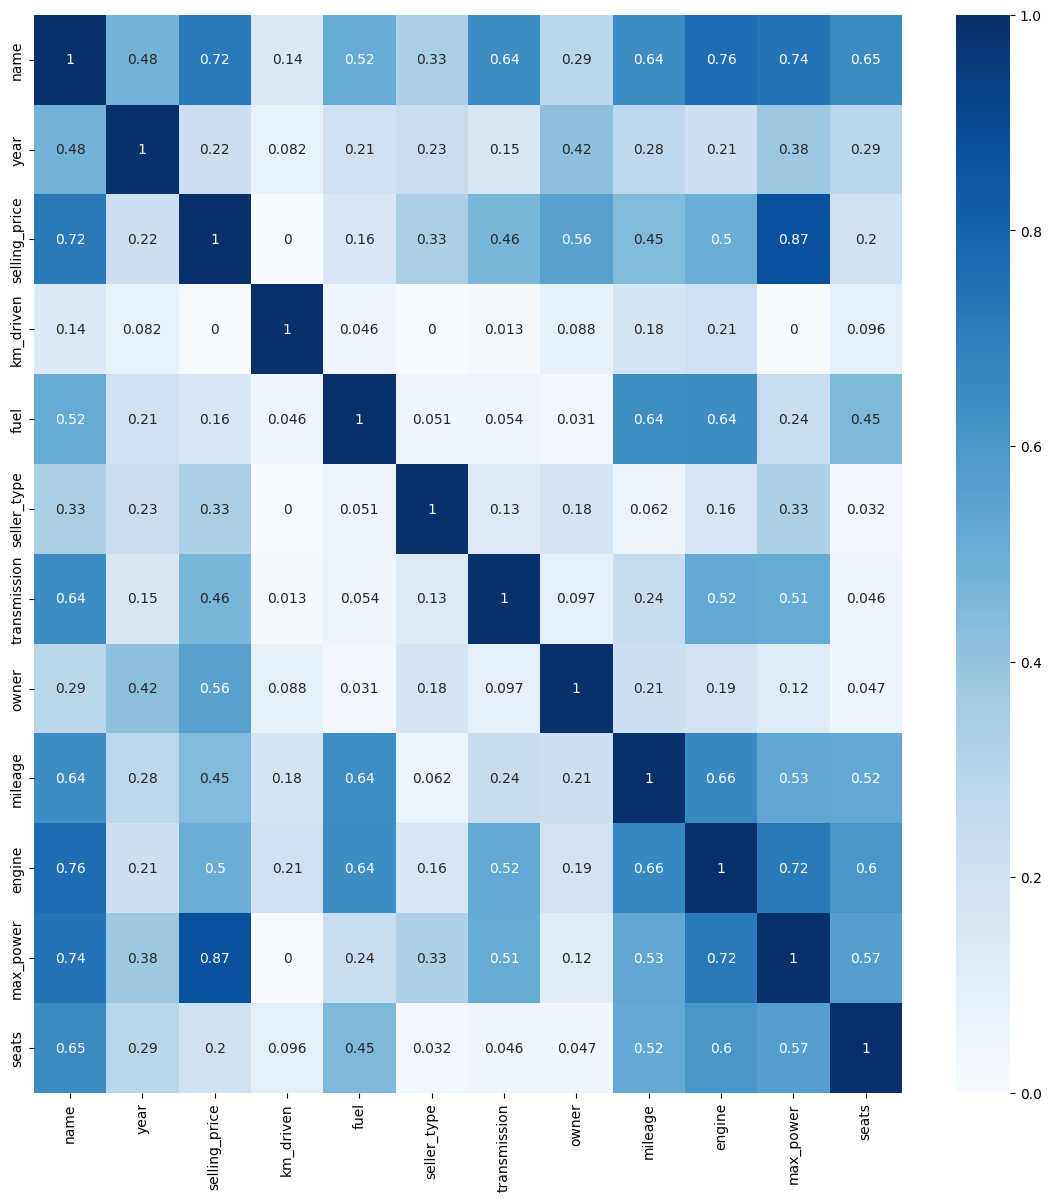

In [53]:
import phik

plt.figure(figsize=(14,14))

ph = df_train_cat.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

При отображении корреляции всех признаков на тепловой карте можно выделить сильную зависимость между наименованием марки автомобиля и его ценой

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [54]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40    1248   
1     Diesel  Individual       Manual          Second Owner    21.14    1498   
2     Diesel  Individual       Manual           First Owner    23.00    1396   
3     Petrol  Individual       Manual           First Owner    16.10    1298   
4     Petrol  Individual       Manual           First Owner    20.14    1197   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92    1086   
5836  Petrol  Individual       Manual          Second Owner    18.90     998   
5837  Petrol  Individual       Manual           First Owner    18.50    1197   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80    1493   
5839  Diesel  Individual       Manual           First Owner    19.30    1248   

      max_power  seats  
0         74.00      5  
1        103.52      5  
2         90.00      5  
3         88.20      5  
4         81.86      5  
...         ...    ...  
5835      62.10      5  
5836      67.10      5  
5837      82.85      5  
5838     110.00      5  
5839      73.90      5  

[5840 rows x 12 columns]

In [55]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(['int', 'float']).drop('selling_price', axis=1)

In [56]:
assert X_train.shape == (5840, 6)

In [57]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(['int', 'float']).drop('selling_price', axis=1)

In [58]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

In [60]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [61]:
prediction = model.predict(X_test)
MSE(y_test, prediction)

233150131369.0009

In [62]:
def print_r2_mse(X_train, y_train, X_test, y_test, model):
  print('*'*20)
  print(f'Значение MSE для трейна:  {MSE(y_train, model.predict(X_train))}')
  print(f'Значение MSE для теста:   {MSE(y_test, model.predict(X_test))}')
  print('*'*20)
  print(f'Значение R^2 для трейна:  {r2_score(y_train, model.predict(X_train))}')
  print(f'Значение R^2 для теста:   {r2_score(y_test, model.predict(X_test))}')
  print('*'*20)


In [63]:
print_r2_mse(X_train, y_train, X_test, y_test, model)

********************
Значение MSE для трейна:  116845733702.86499
Значение MSE для теста:   233150131369.0009
********************
Значение R^2 для трейна:  0.5923583203410302
Значение R^2 для теста:   0.5944005754723716
********************


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [65]:
model_std = LinearRegression()
model_std.fit(X_train_std, y_train)

LinearRegression()

In [66]:
print_r2_mse(X_train_std, y_train, X_test_std, y_test, model_std)

********************
Значение MSE для трейна:  116845733702.8652
Значение MSE для теста:   233150131368.99503
********************
Значение R^2 для трейна:  0.5923583203410294
Значение R^2 для теста:   0.5944005754723818
********************


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

Наиболее информативным оказался признак - max_power

In [67]:
def print_coef(data, model):
  feat_weights = list(zip(data, model.coef_))
  for feature, weight in feat_weights:
    print(f'{feature:>10}: {weight:>20.10f}')

In [68]:
print_coef(X_train, model_std)

      year:    153264.5563686083
 km_driven:    -44148.6618987114
   mileage:     28971.2843189344
    engine:     60838.7574251831
 max_power:    323161.2258637440
     seats:    -23432.5453495566


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [69]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso = lasso_model.fit(X_train_std, y_train)
lasso_predict = lasso.predict(X_test_std)


In [70]:
print_r2_mse(X_train_std, y_train, X_test_std, y_test, lasso_model)

********************
Значение MSE для трейна:  116845733712.95749
Значение MSE для теста:   233150811492.6237
********************
Значение R^2 для трейна:  0.5923583203058203
Значение R^2 для теста:   0.594399392295899
********************


In [71]:
print_coef(X_train, lasso)

      year:    153264.2747445114
 km_driven:    -44147.5524220681
   mileage:     28969.5033173095
    engine:     60833.9619638548
 max_power:    323162.1189020199
     seats:    -23429.6154436192



**Ответы:**

- Lasso регрессия незначительно улучшила качество прогноза.
- L1-регуляризация с параметрами по умолчанию не занулила никакие веса. Это связано скорее всего с тем, что коэффициенты достаточно большие по модулю.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [72]:
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров
param_grid = {
    'alpha': np.arange(10000, 100000, 100)
}

# Выполняем поиск по сетке с кросс-валидацией (ПРОВЕРИТЬ ПАРАМЕТРЫ)
lasso_cv = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_absolute_error',cv=10)
lasso_cv.fit(X_train_std, y_train)

# Выводим лучшие значения параметров и оценку
print("Лучший параметр:", lasso_cv.best_params_)


Лучший параметр: {'alpha': 55000}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [73]:
from sklearn.linear_model import Lasso

lasso_model_cv = Lasso(alpha=55000)
lasso_cv = lasso_model_cv.fit(X_train_std, y_train)

In [74]:
print_r2_mse(X_train_std, y_train, X_test_std, y_test, lasso_cv)

********************
Значение MSE для трейна:  124451265802.738
Значение MSE для теста:   268773883692.72183
********************
Значение R^2 для трейна:  0.5658247723744737
Значение R^2 для теста:   0.5324277455315298
********************


In [75]:
print_coef(X_train, lasso_cv)

      year:    127401.9762769411
 km_driven:        -0.0000000000
   mileage:         0.0000000000
    engine:         0.0000000000
 max_power:    295933.7745022264
     seats:         0.0000000000


In [76]:
count_models = (100000 - 10000) / 100 * 10
count_models

9000.0

**Ответы:**

- Грид сёрчу пришлось обучить 9000 моделей
- У лучшей из моделей коэффициент регуляризации равен 55000. При регуляризации занулились веса следующих признаков: km_driven, mileage, engine, seats

**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [77]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

param_grid = {
    'alpha':np.arange(0.1, 1, 0.01),
    'l1_ratio':np.arange(0.1, 1, 0.01)}

elastic_cv = GridSearchCV(elastic,
                          param_grid,
                          scoring='neg_mean_absolute_error',
                          cv = 10,
                          verbose=0)

elastic_cv.fit(X_train_std, y_train)

# Выводим лучшие значения параметров и оценку
print("Лучший параметр:", elastic_cv.best_params_)

Лучший параметр: {'alpha': 0.7599999999999997, 'l1_ratio': 0.48999999999999977}


In [78]:
elastic_best = ElasticNet(alpha = 0.76, l1_ratio=0.49)
elastic_best.fit(X_train_std, y_train)

ElasticNet(alpha=0.76, l1_ratio=0.49)

In [79]:
print_r2_mse(X_train_std, y_train, X_test_std, y_test, elastic_best)

********************
Значение MSE для трейна:  126429250520.24443
Значение MSE для теста:   279208618297.9707
********************
Значение R^2 для трейна:  0.5589241437675747
Значение R^2 для теста:   0.5142749684941064
********************


In [80]:
print_coef(X_train, elastic_best)

      year:    126094.3376349681
 km_driven:    -44515.4578497340
   mileage:     10918.2996584274
    engine:     83772.8503104736
 max_power:    218154.8360303102
     seats:    -14021.5064872770


In [81]:
count_models = ((1 - 0.1) / 0.01) ** 2 * 10
count_models

81000.0

**Ответы:**

- Грид сёрчу пришлось обучить 900 моделей
- У лучшей из моделей следующие параметры: alpha = 0.76, l1_ratio=0.49

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [82]:
X_train_cat = df_train.copy()
X_test_cat = df_test.copy()
y_train_cat = X_train_cat['selling_price']
y_test_cat = X_test_cat['selling_price']
X_train_cat = X_train_cat.drop(['selling_price'], axis=1)
X_test_cat = X_test_cat.drop(['selling_price'], axis=1)

In [83]:
# X_train_cat = X_train_cat.drop(['name'], axis=1)
# X_test_cat = X_test_cat.drop(['name'], axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [x] Предобработайте столбец `name`, чтобы избежать его удаления

In [84]:
X_train_cat['name'] = X_train_cat['name'].apply(lambda x: x.split()[0] if not pd.isnull(x) else np.nan)
X_test_cat['name'] = X_test_cat['name'].apply(lambda x: x.split()[0] if not pd.isnull(x) else np.nan)

In [85]:
assert X_train_cat.shape == (5840, 11)

In [86]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [87]:
X_train_cat.loc[0,'name'] = 'Opel'
X_train_cat.loc[3,'name'] = 'Ashok'

In [88]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

enc = OneHotEncoder(drop='first')
enc_fit = enc.fit_transform(X_train_cat[["name", "seller_type", "fuel", "transmission", "owner", "seats"]]).toarray()
encoded = pd.DataFrame(enc_fit, columns=enc.get_feature_names_out())
X_train_cat = pd.concat([X_train_cat, encoded], axis=1).drop(columns=["name", "seller_type", "fuel", "transmission", "owner", "seats"])
enc_name = X_train_cat.columns
print(enc_name)
X_train_cat.head(5)

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'name_Ashok',
       'name_Audi', 'name_BMW', 'name_Chevrolet', 'name_Daewoo', 'name_Datsun',
       'name_Fiat', 'name_Force', 'name_Ford', 'name_Honda', 'name_Hyundai',
       'name_Isuzu', 'name_Jaguar', 'name_Jeep', 'name_Kia', 'name_Land',
       'name_Lexus', 'name_MG', 'name_Mahindra', 'name_Maruti',
       'name_Mercedes-Benz', 'name_Mitsubishi', 'name_Nissan', 'name_Opel',
       'name_Peugeot', 'name_Renault', 'name_Skoda', 'name_Tata',
       'name_Toyota', 'name_Volkswagen', 'name_Volvo',
       'seller_type_Individual', 'seller_type_Trustmark Dealer', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14'],
      dtype='object')


year  km_driven  mileage  engine  max_power  name_Ashok  name_Audi  \
0  2014     145500    23.40    1248      74.00         0.0        0.0   
1  2014     120000    21.14    1498     103.52         0.0        0.0   
2  2010     127000    23.00    1396      90.00         0.0        0.0   
3  2007     120000    16.10    1298      88.20         1.0        0.0   
4  2017      45000    20.14    1197      81.86         0.0        0.0   

   name_BMW  name_Chevrolet  name_Daewoo  ...  owner_Test Drive Car  \
0       0.0             0.0          0.0  ...                   0.0   
1       0.0             0.0          0.0  ...                   0.0   
2       0.0             0.0          0.0  ...                   0.0   
3       0.0             0.0          0.0  ...                   0.0   
4       0.0             0.0          0.0  ...                   0.0   

   owner_Third Owner  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  \
0                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
1                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
2                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
3                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
4                0.0      0.0      1.0      0.0      0.0      0.0      0.0   

   seats_10  seats_14  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0  

[5 rows x 54 columns]

In [89]:
encoded = enc.transform(X_test_cat[["name", "seller_type", "fuel", "transmission", "owner", "seats"]]).toarray()
encoded = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
X_test_cat = pd.concat([X_test_cat, encoded], axis=1).drop(columns=["name", "seller_type", "fuel", "transmission", "owner", "seats"])

print(X_test_cat.columns)
X_test_cat.head(5)

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'name_Ashok',
       'name_Audi', 'name_BMW', 'name_Chevrolet', 'name_Daewoo', 'name_Datsun',
       'name_Fiat', 'name_Force', 'name_Ford', 'name_Honda', 'name_Hyundai',
       'name_Isuzu', 'name_Jaguar', 'name_Jeep', 'name_Kia', 'name_Land',
       'name_Lexus', 'name_MG', 'name_Mahindra', 'name_Maruti',
       'name_Mercedes-Benz', 'name_Mitsubishi', 'name_Nissan', 'name_Opel',
       'name_Peugeot', 'name_Renault', 'name_Skoda', 'name_Tata',
       'name_Toyota', 'name_Volkswagen', 'name_Volvo',
       'seller_type_Individual', 'seller_type_Trustmark Dealer', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14'],
      dtype='object')


year  km_driven  mileage  engine  max_power  name_Ashok  name_Audi  \
0  2010     168000     14.0    2498      112.0         0.0        0.0   
1  2017      25000     21.5    1497      108.5         0.0        0.0   
2  2007     218463     12.9    1799      130.0         0.0        0.0   
3  2015     173000     25.1    1498       98.6         0.0        0.0   
4  2011      70000     16.5    1172       65.0         0.0        0.0   

   name_BMW  name_Chevrolet  name_Daewoo  ...  owner_Test Drive Car  \
0       0.0             0.0          0.0  ...                   0.0   
1       0.0             0.0          0.0  ...                   0.0   
2       0.0             0.0          0.0  ...                   0.0   
3       0.0             0.0          0.0  ...                   0.0   
4       0.0             0.0          0.0  ...                   0.0   

   owner_Third Owner  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  \
0                0.0      0.0      0.0      0.0      1.0      0.0      0.0   
1                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
2                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
3                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
4                0.0      0.0      1.0      0.0      0.0      0.0      0.0   

   seats_10  seats_14  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0  

[5 rows x 54 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [90]:
sc = StandardScaler()

sc = sc.fit(X_train_cat)
sc_name = sc.get_feature_names_out()

X_train_cat_std = sc.fit_transform(X_train_cat)
X_test_cat_std = sc.transform(X_test_cat)

In [97]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

ridge_cv = GridSearchCV(ridge,{"alpha":np.arange(0.1, 1000, 1)}, cv = 10)

GridSearchCV(cv=10, error_score='raise-deprecating',
            estimator=Ridge(),
            param_grid={"alpha":np.arange(0.1, 10000, 10)},
            scoring='r2_score')

ridge_cv_train = ridge_cv.fit(X_train_cat_std, y_train_cat)

# Выводим лучшие значения параметров и оценку
print("Лучший параметр:", ridge_cv_train.best_params_)

Лучший параметр: {'alpha': 533.1}


In [98]:
ridge_best = Ridge(alpha = 533.1)
ridge_best.fit(X_train_cat_std, y_train_cat)

Ridge(alpha=533.1)

In [99]:
print_r2_mse(X_train_cat_std, y_train_cat, X_test_cat_std, y_test_cat, ridge_best)

********************
Значение MSE для трейна:  65838793147.16507
Значение MSE для теста:   126048865124.766
********************
Значение R^2 для трейна:  0.7703070931671357
Значение R^2 для теста:   0.7807192007280024
********************


Удалось значительно улучшить качество модели:  
Значение R^2 для трейна:  0.7703070931671357  
Значение R^2 для теста:   0.7807192007280024

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определите, какая лучше всего решает задачу бизнеса

In [100]:
def business_metrics(X_train, X_test, y_train, y_test, model):
  count_train = 0
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  for true, predict in zip(y_train, train_pred):
    # | (a — b) / [ (a + b) / 2 ] | * 100 %
    if abs(( (true - predict) / ((true + predict) / 2) ) * 100) <= 10:
      count_train +=1

  count_test = 0
  for true, predict in zip(y_test, test_pred):
    # | (a — b) / [ (a + b) / 2 ] | * 100 %
    if abs(( (true - predict) / ((true + predict) / 2) ) * 100) <= 10:
      count_test +=1

  print('*'*20)
  print(f'Модель:  {model}')
  print(f'Значение BM для трейна:  {count_train/len(y_train)}')
  print(f'Значение BM для теста:   {count_test/len(y_test)}')
  print('*'*20)


In [101]:
business_metrics(X_train, X_test, y_train, y_test, model)

********************
Модель:  LinearRegression()
Значение BM для трейна:  0.2142123287671233
Значение BM для теста:   0.224
********************


In [102]:
business_metrics(X_train_std, X_test_std, y_train, y_test, model_std)

********************
Модель:  LinearRegression()
Значение BM для трейна:  0.2142123287671233
Значение BM для теста:   0.224
********************


In [103]:
business_metrics(X_train_std, X_test_std, y_train, y_test, lasso_model)

********************
Модель:  Lasso()
Значение BM для трейна:  0.2142123287671233
Значение BM для теста:   0.224
********************


In [104]:
business_metrics(X_train_std, X_test_std, y_train, y_test, lasso_model_cv)

********************
Модель:  Lasso(alpha=55000)
Значение BM для трейна:  0.20753424657534247
Значение BM для теста:   0.236
********************


In [105]:
business_metrics(X_train_std, X_test_std, y_train, y_test, elastic_best)

********************
Модель:  ElasticNet(alpha=0.76, l1_ratio=0.49)
Значение BM для трейна:  0.2261986301369863
Значение BM для теста:   0.252
********************


In [106]:
business_metrics(X_train_cat_std, X_test_cat_std, y_train_cat, y_test_cat, ridge_best)

********************
Модель:  Ridge(alpha=533.1)
Значение BM для трейна:  0.27636986301369865
Значение BM для теста:   0.314
********************


Лучшей с точки зрения бизнес-метрики является Ridge-модель с категориальными признаками

In [107]:
import pickle

data = {
     'best_model': ridge_cv.best_estimator_,
     'coef_model': ridge_cv.best_estimator_.coef_,
     'scaler': sc,
     'scaler_names': sc_name,
     'ohe': enc_fit,
     'ohe_names': enc_name,
     'mileage_median': X_train['mileage'].median(),
     'engine_median' : X_train['engine'].median(),
     'max_power_median' : X_train['max_power'].median(),
     'seats_median' : X_train['seats'].median()
 }

with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

